<a href="https://colab.research.google.com/github/elmedianikhadija/PROJET_machine_learning/blob/main/DBScan_Clustering_IRIS_FINAL2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DBSCAN

# Importation des librairies

In [ ]:
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.datasets import load_iris
import numpy as np
import pandas as pd
from sklearn.metrics import silhouette_score
from google.colab import files
from IPython.display import Image
import math
import matplotlib.pyplot as plt
import matplotlib

from sklearn.neighbors import NearestNeighbors
import warnings
warnings.filterwarnings("ignore")

# DB SCAN Clustering
    

*   Fondamentalement, toutes les méthodes de clustering utilisent la même approche, c'est-à-dire que nous calculons d'abord les similitudes, puis nous l'utilisons pour regrouper les points de données en groupes.
*   Pour exécuter DB Scan, il ne nécessite pas d'entrée pour le nombre de clusters
* Mais DBSCAN a besoin de régler trois autres paramètres


 1. paramètre 'eps':
*   Identique au rayon du cercle
*   C'est la distance maximale entre deux points de données à considérer dans le même voisinage
*   Il définit le voisinage autour d'un point de données, c'est-à-dire que si la distance entre deux points est inférieure ou égale à « eps », alors ils sont considérés comme voisins.
* Si la valeur eps est choisie trop petite, une grande partie des données sera considérée comme aberrante. S'il est choisi très grand, les clusters fusionneront et la majorité des points de données seront dans les mêmes clusters.

 2. Paramètre 'min_samples':


*   C'est la quantité minimale de points de données dans un quartier pour être considéré comme un cluster.

3. paramètre 'métric':


*   La métrique à utiliser lors du calcul de la distance entre les instances dans un tableau d'entités (c'est-à-dire la distance euclidienne). 


---



Dans cet algorithme, nous avons 3 types de points de données.
*   Core Point:un point est un point central s'il a plus de points MinPts dans eps (rayon).


*   Border Point:un point qui a moins de MinPts dans eps mais qui se trouve à proximité d'un point central.
*  Noise or outlier:un point qui n'est pas un point central ou un point frontière. 













    

















# Informations sur les données :

L’ensemble de données est disponible sur le site Web de Kaggle, Il comprend trois espèces d’iris avec 151 échantillons chacune ainsi que certaines propriétés sur chaque fleur. Une espèce de fleur est séparable linéairement des deux autres, mais les deux autres ne sont pas séparables linéairement l’une de l’autre.

Les colonnes de ce jeu de données sont les suivantes :

Id

SepalLengthCm

SepalWidthCm

PétaleNgthCm

PetalWidthCm

Espèce

# Importer la base de donnée

In [ ]:
import urllib.request
dataa = "https://raw.githubusercontent.com/elmedianikhadija/PROJET_machine_learning/main/Iris.csv"
iris_data = pd.read_csv(dataa, thousands=',')
iris_data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


# Transformer la variable Species

In [ ]:
iris_data.Species =iris_data.Species.map({'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica':2})
iris_data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


# Suppression de User ID

In [ ]:
iris_data.drop(['Id'],axis='columns',inplace=True)


In [ ]:
iris_data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


# Preparing Data


Ici, nous avons la variable cible 'Species'.

Il faut supprimer la variable cible, utilisée pour travailler dans un apprentissage non supervisé

La fonction iloc est utilisée pour obtenir les fonctionnalités dont nous avons besoin.

Nous utilisons également la fonction .values pour obtenir un tableau de l'ensemble de données.

Notez que nous avons transformé l'ensemble de données en un tableau afin que nous puissions tracer les graphiques des clusters 

In [ ]:
iris_X = iris_data.iloc[:, [0, 1, 2,3]].values
print(iris_X[:5,:]) # Printing First 5 Rows

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


Maintenant, nous allons séparer la variable cible de l'ensemble de données d'origine;

Et à nouveau convertissez-le en un tableau en utilisant numpy

In [ ]:
iris_Y = iris_data['Species']
iris_Y = np.array(iris_Y)
print(iris_Y)
unique, counts = np.unique(iris_Y, return_counts=True)
freq_2 = dict(zip(unique, counts))
print(freq_2)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
{0: 50, 1: 50, 2: 50}


# Filtering Setosa

In [ ]:
Setosa = iris_data['Species'] == 0
print("Filtering Setosa, True means its Setosa and False means Non Setosa")
print(Setosa.head())
print("Top 6 Rows of Setosa")
Setosa_v2 = iris_data[Setosa]
print(Setosa_v2[Setosa_v2.columns[0:2]].head())
print("Last 6 Rows of Setosa")
print(Setosa_v2[Setosa_v2.columns[0:2]].tail())

Filtering Setosa, True means its Setosa and False means Non Setosa
0    True
1    True
2    True
3    True
4    True
Name: Species, dtype: bool
Top 6 Rows of Setosa
   SepalLengthCm  SepalWidthCm
0            5.1           3.5
1            4.9           3.0
2            4.7           3.2
3            4.6           3.1
4            5.0           3.6
Last 6 Rows of Setosa
    SepalLengthCm  SepalWidthCm
45            4.8           3.0
46            5.1           3.8
47            4.6           3.2
48            5.3           3.7
49            5.0           3.3


# Filtering Setosa for 2D Plot 

Setosa for 2D Plot
X Axis points
[5.1 4.9 4.7 4.6 5.  5.4 4.6 5.  4.4 4.9 5.4 4.8 4.8 4.3 5.8 5.7 5.4 5.1
 5.7 5.1 5.4 5.1 4.6 5.1 4.8 5.  5.  5.2 5.2 4.7 4.8 5.4 5.2 5.5 4.9 5.
 5.5 4.9 4.4 5.1 5.  4.5 4.4 5.  5.1 4.8 5.1 4.6 5.3 5. ]
Y Axis Points
[3.5 3.  3.2 3.1 3.6 3.9 3.4 3.4 2.9 3.1 3.7 3.4 3.  3.  4.  4.4 3.9 3.5
 3.8 3.8 3.4 3.7 3.6 3.3 3.4 3.  3.4 3.5 3.4 3.2 3.1 3.4 4.1 4.2 3.1 3.2
 3.5 3.1 3.  3.4 3.5 2.3 3.2 3.5 3.8 3.  3.8 3.2 3.7 3.3]




(2.0, 4.5)

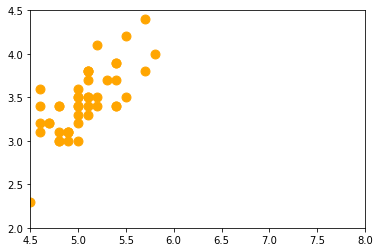

In [ ]:
print("Setosa for 2D Plot")
print("X Axis points")
print(iris_X[iris_Y == 0,0])
print("Y Axis Points")
print(iris_X[iris_Y == 0,1])
print('\n')
plt.scatter(iris_X[iris_Y == 0, 0], iris_X[iris_Y == 0, 1], 
            s = 80, c = 'orange', label = 'Iris-setosa')
plt.xlim([4.5,8])
plt.ylim([2,4.5])

# Filtering Versicolour

In [ ]:
Versi = iris_data['Species'] == 1
print("Filtering Versicolour, True means its Versicolour and False means Non Versicolour")
print(Versi.head())
print("Top 6 Rows of Versicolour")
Versi_v2 = iris_data[Versi]
print(Versi_v2[Versi_v2.columns[0:2]].head())
print("Last 6 Rows of Versicolour")
print(Versi_v2[Versi_v2.columns[0:2]].tail())

Filtering Versicolour, True means its Versicolour and False means Non Versicolour
0    False
1    False
2    False
3    False
4    False
Name: Species, dtype: bool
Top 6 Rows of Versicolour
    SepalLengthCm  SepalWidthCm
50            7.0           3.2
51            6.4           3.2
52            6.9           3.1
53            5.5           2.3
54            6.5           2.8
Last 6 Rows of Versicolour
    SepalLengthCm  SepalWidthCm
95            5.7           3.0
96            5.7           2.9
97            6.2           2.9
98            5.1           2.5
99            5.7           2.8


# Filtering Versicolour for 2D Plot

Versicolour for 2D Plot
X Axis points
[7.  6.4 6.9 5.5 6.5 5.7 6.3 4.9 6.6 5.2 5.  5.9 6.  6.1 5.6 6.7 5.6 5.8
 6.2 5.6 5.9 6.1 6.3 6.1 6.4 6.6 6.8 6.7 6.  5.7 5.5 5.5 5.8 6.  5.4 6.
 6.7 6.3 5.6 5.5 5.5 6.1 5.8 5.  5.6 5.7 5.7 6.2 5.1 5.7]
Y Axis Points
[3.2 3.2 3.1 2.3 2.8 2.8 3.3 2.4 2.9 2.7 2.  3.  2.2 2.9 2.9 3.1 3.  2.7
 2.2 2.5 3.2 2.8 2.5 2.8 2.9 3.  2.8 3.  2.9 2.6 2.4 2.4 2.7 2.7 3.  3.4
 3.1 2.3 3.  2.5 2.6 3.  2.6 2.3 2.7 3.  2.9 2.9 2.5 2.8]




(2.0, 4.5)

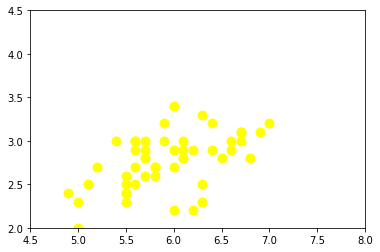

In [ ]:
 print("Versicolour for 2D Plot")
print("X Axis points")
print(iris_X[iris_Y == 1,0])
print("Y Axis Points")
print(iris_X[iris_Y == 1,1])
print('\n')
plt.scatter(iris_X[iris_Y == 1, 0], iris_X[iris_Y == 1, 1], 
            s = 80, c = 'yellow', label = 'Iris-versicolour')

plt.xlim([4.5,8])
plt.ylim([2,4.5])

# Filtering Virginica

In [ ]:
Virginica = iris_data['Species'] == 2
print("Filtering Virginica, True means its Virginica and False means Non Virginica")
print(Virginica.head())
print("Top 6 Rows of Virginica")
Virginica_v2 = iris_data[Virginica]
print(Virginica_v2[Virginica_v2.columns[0:2]].head())
print("Last 6 Rows of Virginica")
print(Virginica_v2[Virginica_v2.columns[0:2]].tail())

Filtering Virginica, True means its Virginica and False means Non Virginica
0    False
1    False
2    False
3    False
4    False
Name: Species, dtype: bool
Top 6 Rows of Virginica
     SepalLengthCm  SepalWidthCm
100            6.3           3.3
101            5.8           2.7
102            7.1           3.0
103            6.3           2.9
104            6.5           3.0
Last 6 Rows of Virginica
     SepalLengthCm  SepalWidthCm
145            6.7           3.0
146            6.3           2.5
147            6.5           3.0
148            6.2           3.4
149            5.9           3.0


# Filtering Virginica for 2D Plot

Virginica for 2D Plot
X Axis points
[6.3 5.8 7.1 6.3 6.5 7.6 4.9 7.3 6.7 7.2 6.5 6.4 6.8 5.7 5.8 6.4 6.5 7.7
 7.7 6.  6.9 5.6 7.7 6.3 6.7 7.2 6.2 6.1 6.4 7.2 7.4 7.9 6.4 6.3 6.1 7.7
 6.3 6.4 6.  6.9 6.7 6.9 5.8 6.8 6.7 6.7 6.3 6.5 6.2 5.9]
Y Axis Points
[3.3 2.7 3.  2.9 3.  3.  2.5 2.9 2.5 3.6 3.2 2.7 3.  2.5 2.8 3.2 3.  3.8
 2.6 2.2 3.2 2.8 2.8 2.7 3.3 3.2 2.8 3.  2.8 3.  2.8 3.8 2.8 2.8 2.6 3.
 3.4 3.1 3.  3.1 3.1 3.1 2.7 3.2 3.3 3.  2.5 3.  3.4 3. ]




(2.0, 4.5)

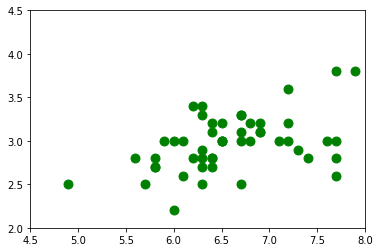

In [ ]:
print("Virginica for 2D Plot")
print("X Axis points")
print(iris_X[iris_Y == 2,0])
print("Y Axis Points")
print(iris_X[iris_Y == 2,1])
print('\n')
plt.scatter(iris_X[iris_Y == 2, 0], iris_X[iris_Y == 2, 1], 
            s = 80, c = 'green', label = 'Iris-virginica')
plt.xlim([4.5,8])
plt.ylim([2,4.5])

# Visualisez les classes en même temps


Dans cet ensemble de données Iris, nous avons trois classes (0,1,2)

On visualise ces classes dans un graphe 2-D

Cela nous aidera à comparer les classes d'origine avec les clusters créés

Tracez les trois types de fleurs sur un graphique

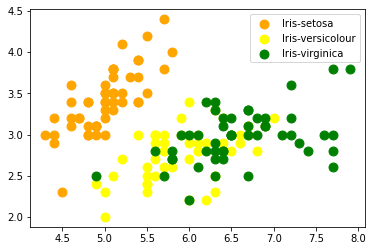

In [ ]:
plt.scatter(iris_X[iris_Y == 0, 0], iris_X[iris_Y == 0, 1], 
            s = 80, c = 'orange', label = 'Iris-setosa')
plt.scatter(iris_X[iris_Y == 1, 0], iris_X[iris_Y == 1, 1], 
            s = 80, c = 'yellow', label = 'Iris-versicolour')
plt.scatter(iris_X[iris_Y == 2, 0], iris_X[iris_Y == 2, 1], 
            s = 80, c = 'green', label = 'Iris-virginica')
plt.legend()



# Scale Data

In [ ]:
df = iris_data.iloc[:,:-1]

for col in df.columns:
  avg = df[col].mean()
  sd = df[col].std()
  df[col] = df[col].apply(lambda x: (x-avg)/sd)

df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,-0.897674,1.028611,-1.336794,-1.308593
1,-1.139200,-0.124540,-1.336794,-1.308593
2,-1.380727,0.336720,-1.393470,-1.308593
3,-1.501490,0.106090,-1.280118,-1.308593
4,-1.018437,1.259242,-1.336794,-1.308593


# DBSCAN Clustering

In [ ]:
min_samples = df.shape[1]*2 
dbscan = DBSCAN(eps = 0.5,min_samples = min_samples)
dbscan

DBSCAN(min_samples=8)

# Fitting the model

In [ ]:
clusters = dbscan.fit_predict(df)
print("Clusters Created : "+str(list(set(clusters))))


Clusters Created : [0, 1, 2, -1]


Ici la valeur est minimum=2 car dans la bibliothèque sklearn, l'algorithme se considère également

 Donc la première distance sera 0 car il calcule la distance d'un point à son propre point

Par conséquent, nous avons besoin d'un autre point (minimum) pour calculer une distance (plus de 0)

Nous considérons donc au moins deux points (un point lui-même et un autre point de données)

In [ ]:
k = min_samples if min_samples > 2 else 2
nbrs = NearestNeighbors(n_neighbors= k).fit(df)
distances, indices = nbrs.kneighbors(df) 

In [ ]:
print("Minimum Samples : "+str(min_samples))
print("Shape of Distance Matrix : "+ str(distances.shape)+"\n")
print("Showing distance to each datapoints (small to large distance) from itself")
print("8 because we mentioned Minimum Samples = 8")
print("Last value 8th row will be highest among all the 8 Distances (8-NN)\n")

print("First 5 Datapoints of the dataset:")
for enum, row in enumerate(distances[:5]):
  print("observations "+str(enum)+":"+str([round(x,2) for x in row]))



Minimum Samples : 8
Shape of Distance Matrix : (150, 8)

Showing distance to each datapoints (small to large distance) from itself
8 because we mentioned Minimum Samples = 8
Last value 8th row will be highest among all the 8 Distances (8-NN)

First 5 Datapoints of the dataset:
observations 0:[0.0, 0.13, 0.13, 0.19, 0.24, 0.26, 0.26, 0.27]
observations 1:[0.0, 0.17, 0.18, 0.18, 0.27, 0.27, 0.27, 0.28]
observations 2:[0.0, 0.13, 0.17, 0.28, 0.31, 0.36, 0.37, 0.38]
observations 3:[0.0, 0.24, 0.25, 0.27, 0.28, 0.35, 0.35, 0.36]
observations 4:[0.0, 0.26, 0.27, 0.29, 0.34, 0.37, 0.43, 0.46]



150 est le nombre de lignes

8 est la distance à 8 points de données de chaque observation

In [ ]:
df['knn_farthest_distance'] = distances[:,-1]
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,knn_farthest_distance
0,-0.897674,1.028611,-1.336794,-1.308593,0.266432
1,-1.139200,-0.124540,-1.336794,-1.308593,0.283941
2,-1.380727,0.336720,-1.393470,-1.308593,0.376223
3,-1.501490,0.106090,-1.280118,-1.308593,0.363191
4,-1.018437,1.259242,-1.336794,-1.308593,0.464730


La dernière cellule de chaque ligne représente la valeur la plus élevée du Kème point le plus éloigné

Ajout du point le plus éloigné à l'ensemble de données

   index  SepalLengthCm  ...  PetalWidthCm  knn_farthest_distance
0    131       2.483699  ...      1.050019               1.919676
1    117       2.242172  ...      1.312087               1.821781
2     41      -1.622254  ...     -1.177559               1.662818
3     15      -0.173094  ...     -1.046525               1.567494
4    118       2.242172  ...      1.443121               1.526265

[5 rows x 6 columns]


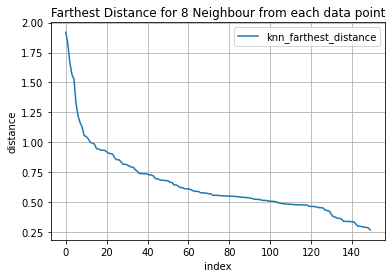

In [ ]:
# Farthest Distance for 8 Neighbour from each data point 
df.sort_values('knn_farthest_distance',ascending=False).reset_index()[['knn_farthest_distance']].plot()
print(df.sort_values('knn_farthest_distance',ascending=False).reset_index().head())
plt.xlabel('index')
plt.ylabel('distance')
plt.title('Farthest Distance for 8 Neighbour from each data point')
plt.grid(True)
plt.show()


Beaucoup auront une valeur différente d'eps respectivement

Calculer la distance de silhouette sous la séparation entre les clusters

In [ ]:
df = df.iloc[:,:-1] 
second_model = DBSCAN(eps = 0.7, min_samples=min_samples)
df['clusters'] = second_model.fit_predict(df)
print("Frequency of DBScan Output Cluster v1")
print(df.clusters.value_counts())

# Original Cluster
print("\nOriginal Cluster")
print(freq_2)

Frequency of DBScan Output Cluster v1
 1    86
 0    47
-1    17
Name: clusters, dtype: int64

Original Cluster
{0: 50, 1: 50, 2: 50}


la plage eps sera supérieure à 0

La valeur la plus élevée dépend de la mise à l'échelle

Si la mise à l'échelle est de 0 à 1, la plage eps est de 0 à 1, sinon elle peut avoir des valeurs plus élevées supérieures à 1